In [300]:
#Carter Hardy
#BMI 6018
#Nov-25-2024

In [301]:
#%% libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [302]:
#%% data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [303]:
#covid_df.head()

In [304]:
#subset of Utah data
utah_df = covid_df[covid_df['Province_State'] == 'Utah']

In [305]:
sns.set_theme(style="ticks", palette="pastel")

In [306]:
# Instructions
# Overall instructions:
# As described in the homework description, each graphic you make must:
#    1. Have a thoughtful title
#    2. Have clearly labelled axes
#    3. Be legible
#    4. Not be a pie chart
# I should be able to run your .py file and recreate the graphics without error.
# As per usual, any helper variables or columns you create should be thoughtfully
# named.

In [307]:
# viz 1

#Create a visualization that shows all of the counties in Utah as a time series,
#similar to the one shown in slide 22 during the lecture. The graphic should
#-Show cases over time
#-Have all counties plotted in a background color (something like grey)
#-Have a single county plotted in a contrasting color (something not grey)
#-Have well formatted dates as the X axis

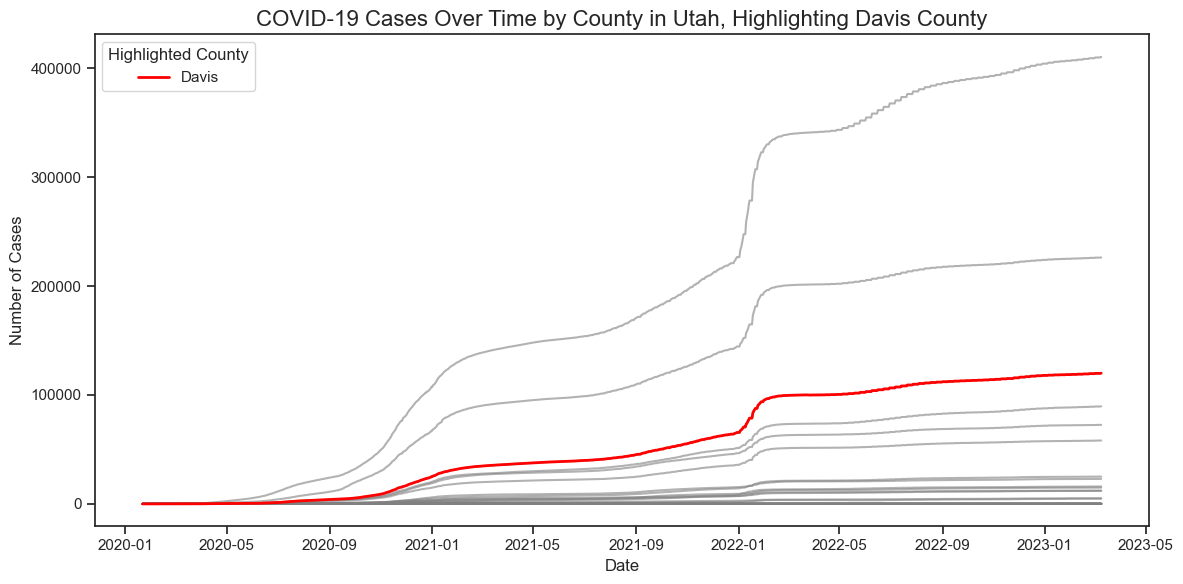

In [308]:
#The date columns start on January 22, 2020 which is the 10th column.
date_columns = utah_df.columns[10:]  

# Transpose the data so dates are the index, and counties are columns
county_time_series = utah_df.set_index('Admin2')[date_columns].T
county_time_series.index = pd.to_datetime(county_time_series.index, format='%m/%d/%y')

#Because I am from Davis county I chose to highlight the covid case of Davis county. Davis county will be a red line on the plot 
#to stand out from the other counties.
highlight_county = 'Davis'

plt.figure(figsize=(12, 6))

#all the counties will be plotted in grey
for county in county_time_series.columns:
    plt.plot(county_time_series.index, county_time_series[county], color='grey', alpha=0.6)

#For Davis county create a red line of the covid cases 
if highlight_county in county_time_series.columns:
    plt.plot(
        county_time_series.index,
        county_time_series[highlight_county],
        color='red',
        label=highlight_county,
        linewidth=2
    )

#Title and label details
plt.title('COVID-19 Cases Over Time by County in Utah, Highlighting Davis County', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title='Highlighted County', loc='upper left')

plt.tight_layout()
plt.show()


In [309]:
#%% viz 2

# Create a visualization that shows the contrast between the county in Utah with
# the most cases to date to a county in Florida with the most cases to date.
# The graphic should:
# -Have only two counties plotted
# -Highlight the difference between the two comparison counties
# You may use any style of graphic you like as long as it is effective (dense)
# and readable

In [310]:
florida_df = covid_df[covid_df['Province_State'] == 'Florida']

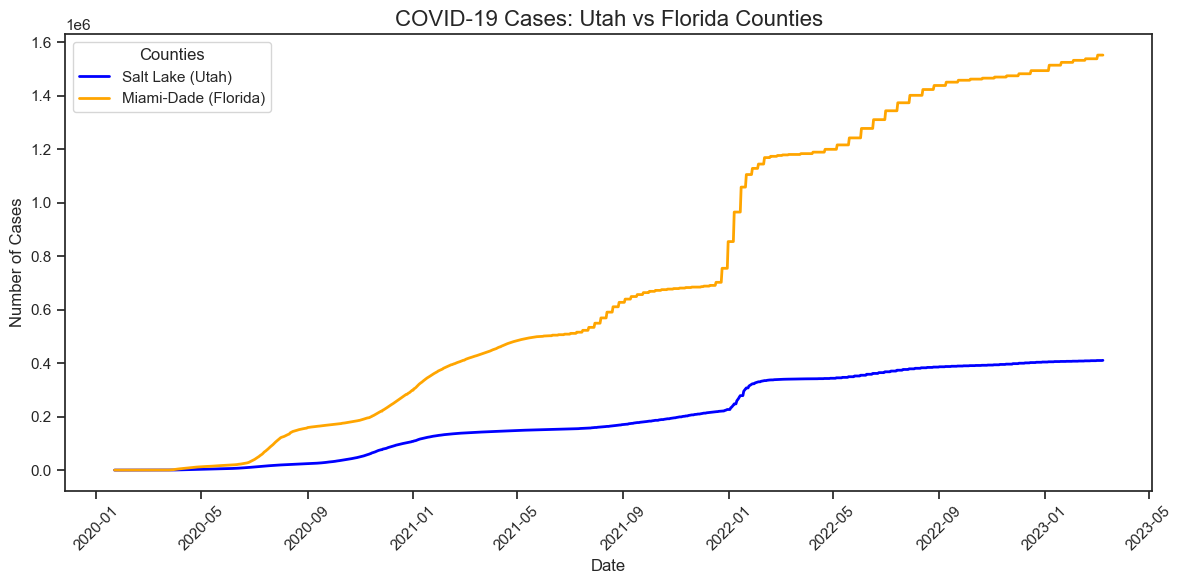

In [311]:
#Find which county has the most covid cases for Florida and Utah
utah_max_county = utah_df.loc[utah_df[date_columns].sum(axis=1).idxmax(), 'Admin2']
florida_max_county = florida_df.loc[florida_df[date_columns].sum(axis=1).idxmax(), 'Admin2']

#transpose data
utah_max_data = utah_df[utah_df['Admin2'] == utah_max_county][date_columns].T
florida_max_data = florida_df[florida_df['Admin2'] == florida_max_county][date_columns].T

utah_max_data.index = pd.to_datetime(utah_max_data.index, format='%m/%d/%y')
florida_max_data.index = pd.to_datetime(florida_max_data.index, format='%m/%d/%y')

plt.figure(figsize=(12, 6))

#plot both of the counties from Florida and Utah
plt.plot(utah_max_data.index, utah_max_data.values, label=f'{utah_max_county} (Utah)', color='blue', linewidth=2)
plt.plot(florida_max_data.index, florida_max_data.values, label=f'{florida_max_county} (Florida)', color='orange', linewidth=2)

#Title and label details
plt.title('COVID-19 Cases: Utah vs Florida Counties', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title="Counties", loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [312]:
#%% viz 3

# Create a visualization that shows BOTH the running total of cases for a single
# county AND the daily new cases. The graphic should:
# -Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
# -Use color to contrast the two series being plotted
# -Have well formatted dates as the X axis

In [313]:
#Salt Lake county dataframe
sl_df = utah_df[utah_df['Admin2'] == 'Salt Lake']

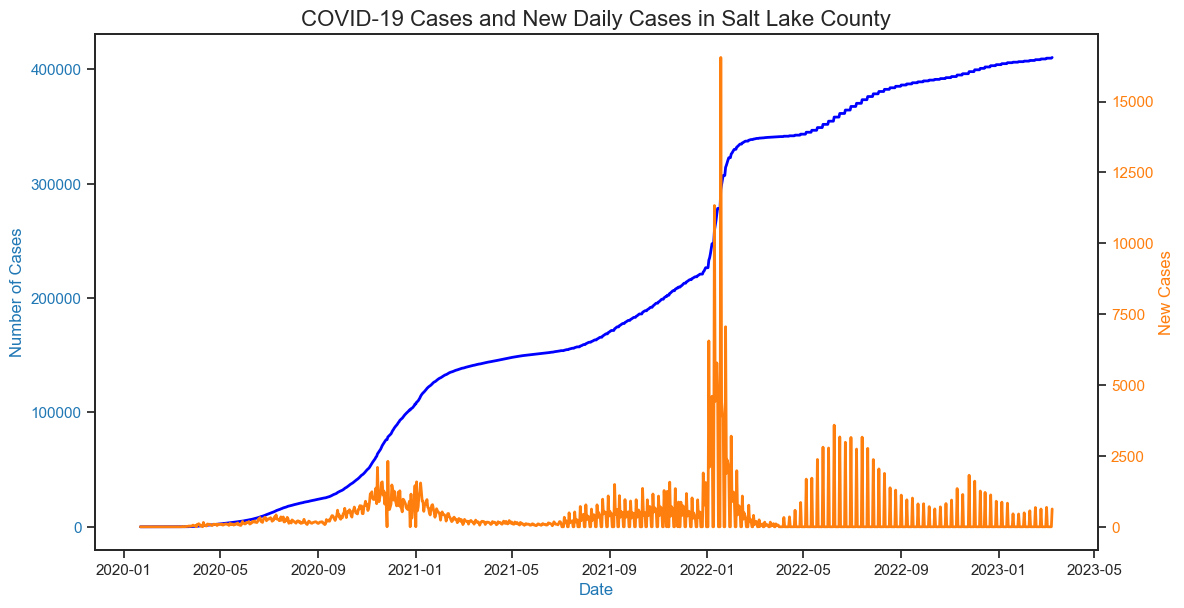

In [314]:
sl_date_data = sl_df[date_columns].T
sl_date_data.index = pd.to_datetime(sl_date_data.index, format='%m/%d/%y')

#plot for total covid cases in Salt Lake County
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.plot(sl_date_data.index, sl_date_data.values, label = 'Salt Lake County', color='blue', linewidth=2)
ax1.set_xlabel('Date', color=color)
ax1.set_ylabel('Number of Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)

#start plot for new cases measured daily 
new_cases = sl_date_data.diff().fillna(0)

#instantiate a second Axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('New Cases', color=color)
ax2.plot(new_cases.index, new_cases.values, label='New Cases in Salt Lake County', color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

#Title and label details, other label details were included in the plots for these.
plt.title('COVID-19 Cases and New Daily Cases in Salt Lake County', fontsize= 16)
plt.xticks(rotation=45)
plt.show()

In [315]:
#%% viz 4

# Create a visualization that shows a stacked bar chart of county contributions
# to a given state's total cases. You may choose any state (or states).
# (https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
# The graphic should:
# -Have a single column delineate a state
# -Have each 'slice' or column component represent a county

In [316]:
#create county subset
#3/9/23 is the last day we have of data, so it will have the total amoumnt of cases per county 
county_subset_non_zero = utah_df[utah_df['3/9/23'] > 0][['Admin2', '3/9/23']]
print(county_subset_non_zero)

                  Admin2  3/9/23
UID                             
84070015      Bear River   58205
84070016    Central Utah   22956
84049011           Davis  120040
84049035       Salt Lake  410508
84049037        San Juan    5149
84070017  Southeast Utah   11943
84070018  Southwest Utah   72559
84049043          Summit   15979
84049045          Tooele   25075
84070019       TriCounty   14966
84090049      Unassigned    4843
84049049            Utah  226280
84049051         Wasatch   12224
84070020    Weber-Morgan   89619


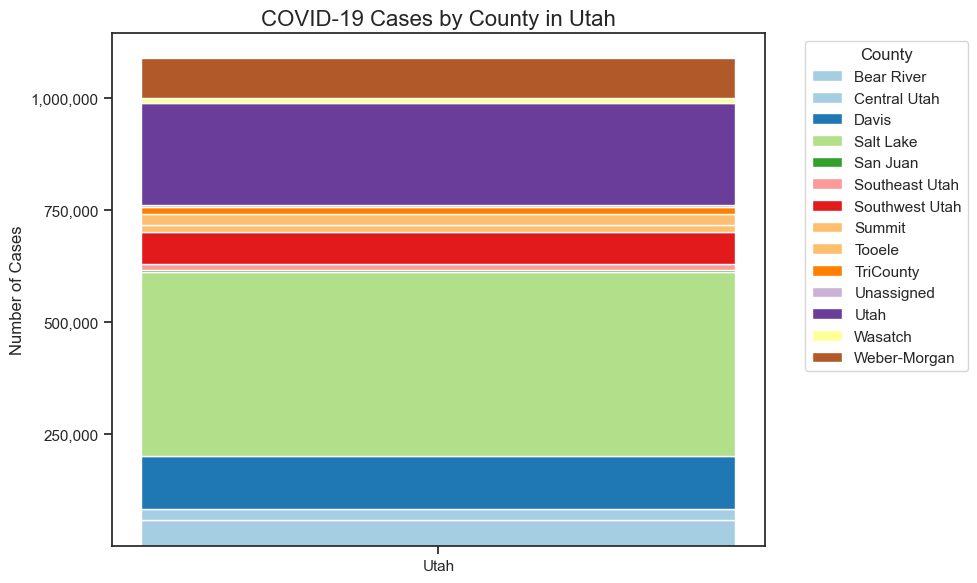

In [317]:
fig, ax = plt.subplots(figsize=(10, 6))

#Initalize the bottom of the column to add each county's cases
bottom_value = 0

#Loop through the dataframe and plot each county's cases
for index, row in county_subset_non_zero.iterrows():
    county = row['Admin2']
    cases = row['3/9/23']
    ax.bar('Utah', cases, bottom=bottom_value,  label=county, color=plt.cm.Paired(county_subset_non_zero.index.get_loc(row.name) / len(county_subset_non_zero)))

    bottom_value += cases

#Title and label details
ax.set_title('COVID-19 Cases by County in Utah', fontsize=16)
ax.set_ylabel('Number of Cases', fontsize=12)

#I did not like the way the y axis was measuring, I changed it to count by 250,000 starting from 250,000 to 1,000,000
ax.set_yticks(range(250000, 1000001, 250000))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [318]:
#%% extra credit (5 points)

# Use Seaborn to create a grouped box plot of all reported states. Each boxplot
# should be a distinct state. Have the states ordered from most cases (FL) to fewest 
# cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)

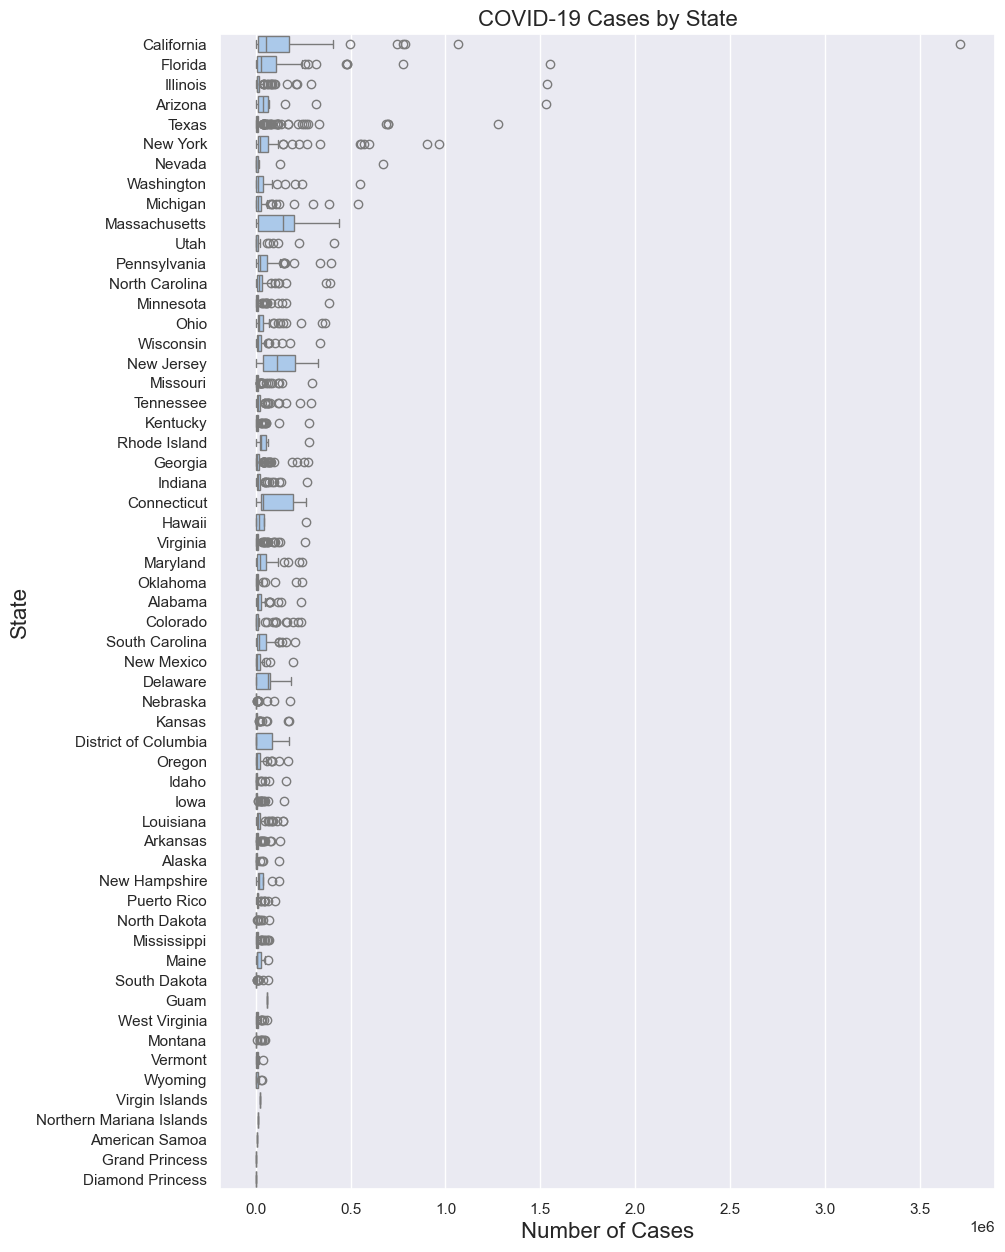

In [319]:
import seaborn as sns

#sort the states by the most amount of covid cases, using 3/9/23 as the total again.
sorted_states = covid_df.groupby('Province_State')['3/9/23'].max().sort_values(ascending=False).index

sns.set_theme(style="darkgrid", palette="pastel")

plt.figure(figsize=(10, 15))
sns.boxplot(y="Province_State", x="3/9/23",
            data=covid_df, order=sorted_states, orient='h')

#Title and label details
plt.title('COVID-19 Cases by State', fontsize=16)
plt.xlabel('Number of Cases', fontsize=16)
plt.ylabel('State', fontsize=16)

plt.show()


In [320]:
#I tried many ways to make this plot more readable which is why I chose to oreint it horizontally. 
#It is doing its calculation on the counties, which is causing there to be a lot of outliers in the plots, and ultimately making this plot
#realtively unreadable. Excluding the outliers doesn't help us much because we are leaving out the counties with the most cases and frankly
#we are leaving out a lot of important data by exlcluding these outliers specifically. 


#I was surprised that California was the highest consider the problem said that Florida should be the most, so I summed the covid cases
#and found that California had a higher amount of Covid cases.

In [321]:
cal_df = covid_df[covid_df['Province_State'] == 'California']

cal_df['3/9/23'].sum()

np.int64(12129699)

In [322]:
fl_df = covid_df[covid_df['Province_State'] == 'Florida']

fl_df['3/9/23'].sum()

np.int64(7574590)

In [323]:
#Here is another plot not showing the outliers, to make it a little more readable. By doing this however, it excluded a lot of data.

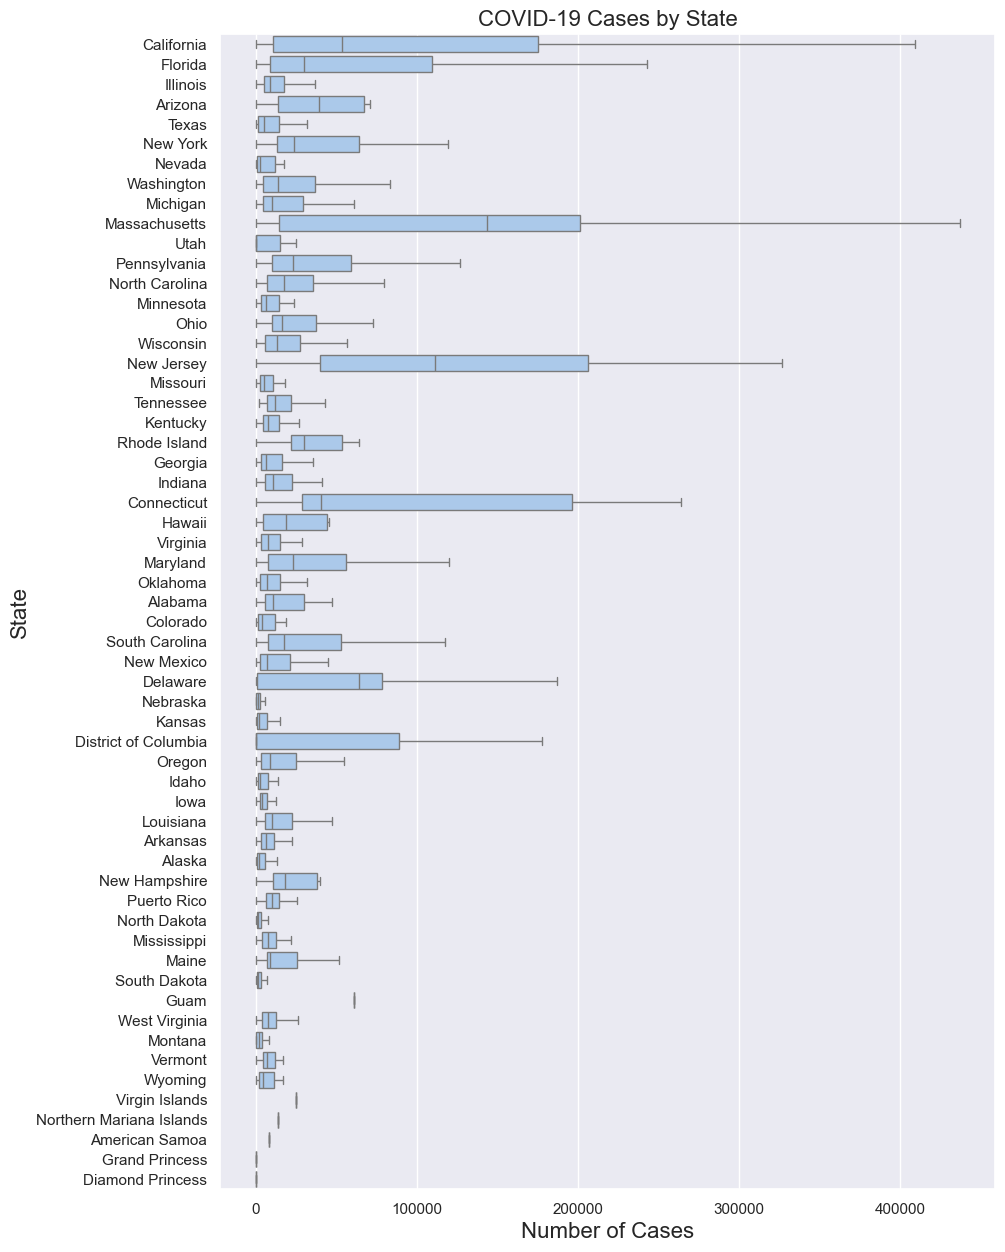

In [324]:
plt.figure(figsize=(10, 15))
sns.boxplot(y="Province_State", x="3/9/23",
            data=covid_df, order=sorted_states, orient='h', showfliers = False)


#Title and label details
plt.title('COVID-19 Cases by State', fontsize=16)
plt.xlabel('Number of Cases', fontsize=16)
plt.ylabel('State', fontsize=16)

plt.show()